<a href="https://colab.research.google.com/github/Geon27/4-1-Boston_housin/blob/main/%EB%B3%B4%EC%8A%A4%ED%84%B4_%EC%A7%91%EA%B0%92_%EC%98%88%EC%B8%A1(1128%2C_%EC%A4%80%EC%B5%9C%EC%A2%85).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#파이썬 

- 나의 구글 드라이브와 구글 코랩의 연결  
- 이 과정(마운트)을 통해 나의 구글 드라이브내의 데이터를 구글 코랩에 로드하고 또한 분석된 내용을 저장하는것도 가능하게 됨

In [1]:
#구글 드라이브 연동
from google.colab import drive
drive.mount('/content/drive') 

# 아래 출력되는 URL에 접속하여 이용 동의 후 생성되는 인증코드를 복사해서 붙여넣기

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 파이썬 패키지 설치

패키지라 함은 메인엔진은 파이썬이 잘 구현될 수 있도록 지원해주는 체계로서 패키지안에 함수나 클래스 등이 포함되어 있음  
패키지를 사용하려면 2단계(인스톨-로드)를 거치는데 로드는 매번 인스톨은 처음에 1회만 하면 되는데 구글 코랩에서는 단점으로서 클라우드 방식이므로 인스톨을 매번해주어야 하는 번거로움이 있음

#### 패키지 로드

아래 코드는 인스톨 코드이므로 후에 로드를 다시 해주어야 함  
코랩에서는 다른 파이썬 IDE와 다르게 이미 필요한 패키지들이 설치되어 있어서 비교적 편리함  
다만 어떤 패키지는 버전에 따라 상황이 달라질 수 있으므로 같은 패키지여도 필요한 버전을 추가로 설치해야 하는 경우도 발생될 수 있음

패키지 설치와 로드는 바디만 있는 깡통자동차에 필요한 도구들을 설치하는 것과 같음. 예를 들어 필요한 경우 에어콘(패키지)을 자동차에 설치(패키지 인스톨)하여 스위치(패키지 로드)를 켜야 에어콘을 사용할 수 있는 것과 같은 원리임.
코랩의 경우 필요한 패키지가 미리 설치되어 있는 경우가 있음. 미리 설치되지 않은 것말 추가로 인스톨 해야함

In [2]:
# !pip uninstall scipy -y
# !pip uninstall pingouin -y
!pip install pingouin
# !pip install statsmodels==0.13.1
!pip install sidetable
# !pip install researchpy 
# !pip install bioinfokit
# !pip install sidetable


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


패키지 인스톨 명령어 `"!pip install 패키지이름"`로 인스톨함

#### 패키지 로드

In [3]:
import seaborn as sns
import pandas as pd
#import datatable as dt
import scipy.stats as ss
from sklearn import datasets
import numpy
import sidetable 
from scipy.stats import mode
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.formula.api as smf
pd.options.display.float_format = lambda x: f'{x:.3f}'
#pd.reset_option('display.float_format')

## 데이터로드

바로 아래의 R버전은 파이썬과 대칭되어 동일한 명령을 R에서 수행할때의 코드이므로 참고하기 바람

In [4]:
# #R버전
# # 데이터 로드: 엑셀파일
# # file.choose()
# Dataset <- read.xlsx(“경로”, sheet = 1) # 파일명: 관광수요_데이터_예제_R업로드_환경부.xlsx

# # 데이터 로드 확인
# dim(Dataset)                       # 데이터의 가로세로수 확인
# head(Dataset)                      # 데이터 앞부분(6개)확인
# names(Dataset)                     # 데이터셋내의 변수명 확인
# datatable(Dataset)                  # html형태로 데이터 로드 상태 확인


나의 구글 드라이브에서 원하는 데이터 파일을 찾아서(drive-My drive) 이에 대한 경로를 복사하여 아래 코드의 `' '`부분에 붙여 넣기  
아래의 경로는 이전 사용자의 고유경로이므로 바로 실행하면 에러가 발생될 수 있음

In [5]:
##데이터 로드: 엑셀파일
# 파일명: housing.csv
Df = pd.read_csv('/content/drive/MyDrive/보스턴_데이터과학/housing.csv')

위 코드는 read_excel이라는 함수를 통해 엑셀(.xlsx)파일을 열어서 이를 Df라는 장소에 저장하는 것음. pd라는 것은 read_excel함수를 포함하고 있는 패키지(pandas, 판다스)의 줄인 이름임. 이에 대한 내용은 패키지 로드부분에 정의되어 있음  
pd.read_excel을 통해 도출된 데이터는 Dataset이라는 곳에 저장되게 됨

In [6]:
#Df[1:1] #변수명만 추출
Df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

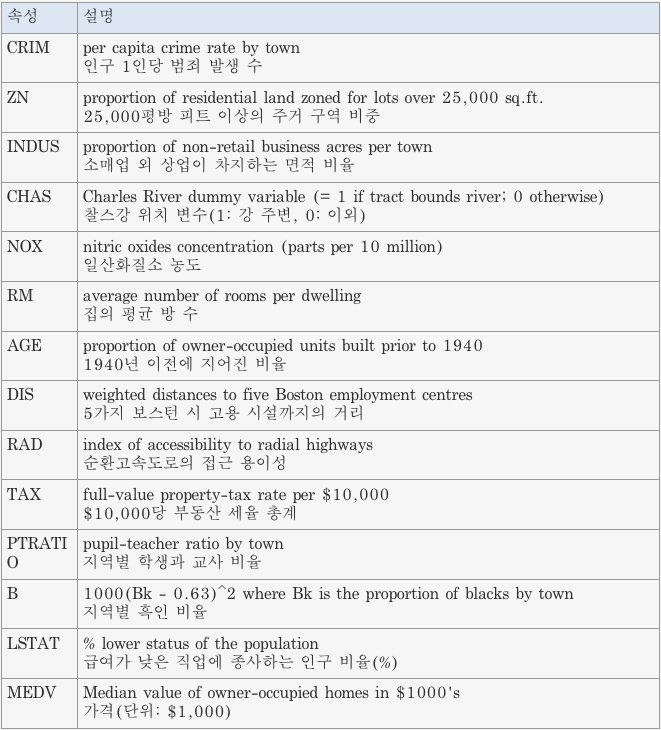

인덱싱이라고 해서 데이터의 일부분을 가져오고자 하는 경우 사용하는데 `:`을 기준으로 왼쪽이 행, 오른쪽이 열이 됨

In [7]:
# 데이터 로드 확인
print(Df.shape)            # 데이터의 가로세로수 확인
print(Df.head())           # 데이터 앞부분(5개)확인
print(Df.tail())           # 데이터 뒷부분(5개)확인

(506, 14)
   CRIM     ZN  INDUS  CHAS   NOX    RM    AGE   DIS   RAD     TAX  PTRATIO  \
0 0.006 18.000  2.310 0.000 0.538 6.575 65.200 4.090 1.000 296.000   15.300   
1 0.027  0.000  7.070 0.000 0.469 6.421 78.900 4.967 2.000 242.000   17.800   
2 0.027  0.000  7.070 0.000 0.469 7.185 61.100 4.967 2.000 242.000   17.800   
3 0.032  0.000  2.180 0.000 0.458 6.998 45.800 6.062 3.000 222.000   18.700   
4 0.069  0.000  2.180 0.000 0.458 7.147 54.200 6.062 3.000 222.000   18.700   

        B  LSTAT   MEDV  
0 396.900  4.980 24.000  
1 396.900  9.140 21.600  
2 392.830  4.030 34.700  
3 394.630  2.940 33.400  
4 396.900  5.330 36.200  
     CRIM    ZN  INDUS  CHAS   NOX    RM    AGE   DIS   RAD     TAX  PTRATIO  \
501 0.063 0.000 11.930 0.000 0.573 6.593 69.100 2.479 1.000 273.000   21.000   
502 0.045 0.000 11.930 0.000 0.573 6.120 76.700 2.288 1.000 273.000   21.000   
503 0.061 0.000 11.930 0.000 0.573 6.976 91.000 2.167 1.000 273.000   21.000   
504 0.110 0.000 11.930 0.000 0.573 6.79

In [8]:
Df = pd.DataFrame(Df) # 데이터 한눈에 보기
Df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.006,18.000,2.310,0.000,0.538,6.575,65.200,4.090,1.000,296.000,15.300,396.900,4.980,24.000
1,0.027,0.000,7.070,0.000,0.469,6.421,78.900,4.967,2.000,242.000,17.800,396.900,9.140,21.600
2,0.027,0.000,7.070,0.000,0.469,7.185,61.100,4.967,2.000,242.000,17.800,392.830,4.030,34.700


In [9]:
Df['TAX'].value_counts()

666.000    132
307.000     40
403.000     30
437.000     15
304.000     14
          ... 
285.000      1
198.000      1
256.000      1
244.000      1
313.000      1
Name: TAX, Length: 66, dtype: int64

위 데이터셋에서는 python_score에 영향을 주는 요인들로 gender, income, iq, toeic, math등이 있는 것을 알 수 있음. 이는 통계적 관점에서는 회귀분석 모델이며 머신러닝에서는 지도학습중 수치예측의 경우에 속함.  회귀분석에서는 영향을 주는 것을 독립변수라 하고 영향을 받는 것을 종속변수라고 하는데 머신러닝에서는 이를 각각 feature와 target이라고 명명함

### 질적 target에 대한 탐색적 분석

In [10]:
Df['MEDV'].value_counts()

50.000    16
25.000     8
22.000     7
21.700     7
23.100     7
          ..
32.900     1
34.600     1
30.300     1
33.300     1
8.100      1
Name: MEDV, Length: 229, dtype: int64

In [11]:
import sidetable as stb
Df.stb.freq(['MEDV'])

,MEDV,count,percent,cumulative_count,cumulative_percent
0,50.000,16,3.162,16,3.162
1,25.000,8,1.581,24,4.743
2,23.100,7,1.383,31,6.126
3,22.000,7,1.383,38,7.510
4,21.700,7,1.383,45,8.893
...,...,...,...,...,...
224,8.100,1,0.198,502,99.209
225,7.500,1,0.198,503,99.407
226,7.400,1,0.198,504,99.605
227,6.300,1,0.198,505,99.802


###여러변수의 기술통계분석: 양적변수

In [12]:
#양적변수들을 num_vars로 설정
num_vars = Df[['CRIM','ZN','INDUS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']]

In [13]:
#여러변수에 대한 평균
vars_mean = numpy.mean(num_vars) 
round(vars_mean,3) #소수점 3자리 반올림

CRIM        3.614
ZN         11.364
INDUS      11.137
NOX         0.555
RM          6.285
AGE        68.575
DIS         3.795
RAD         9.549
TAX       408.237
PTRATIO    18.456
B         356.674
LSTAT      12.653
dtype: float64

In [14]:
# 중앙값
#target_vars.target_vars()
vars_median = numpy.median(num_vars, axis=0)
#vars_median = target_vars.apply(numpy.median(target_vars), axis=1)
vars_median
#round(vars_median,3) #소수점 3자리 반올림

array([2.56510e-01, 0.00000e+00, 9.69000e+00, 5.38000e-01, 6.20850e+00,
       7.75000e+01, 3.20745e+00, 5.00000e+00, 3.30000e+02, 1.90500e+01,
       3.91440e+02, 1.13600e+01])

In [15]:
Df_sub = num_vars.describe()
Df_sub

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000
mean,3.614,11.364,11.137,0.555,6.285,68.575,3.795,9.549,408.237,18.456,356.674,12.653
std,8.602,23.322,6.860,0.116,0.703,28.149,2.106,8.707,168.537,2.165,91.295,7.141
min,0.006,0.000,0.460,0.385,3.561,2.900,1.130,1.000,187.000,12.600,0.320,1.730
25%,0.082,0.000,5.190,0.449,5.885,45.025,2.100,4.000,279.000,17.400,375.377,6.950
50%,0.257,0.000,9.690,0.538,6.208,77.500,3.207,5.000,330.000,19.050,391.440,11.360
75%,3.677,12.500,18.100,0.624,6.623,94.075,5.188,24.000,666.000,20.200,396.225,16.955
max,88.976,100.000,27.740,0.871,8.780,100.000,12.127,24.000,711.000,22.000,396.900,37.970


In [16]:
Df.info() #데이터정보확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


### 질적변수에 대한 탐색적 분석

In [17]:
var_cate  = Df[["CHAS"]] # 'name',
var_cate

,CHAS
0,0.000
1,0.000
2,0.000
3,0.000
4,0.000
...,...
501,0.000
502,0.000
503,0.000
504,0.000


In [18]:
import sidetable as stb
for col in var_cate:
  print(var_cate.stb.freq([col]))

   CHAS  count  percent  cumulative_count  cumulative_percent
0 0.000    471   93.083               471              93.083
1 1.000     35    6.917               506             100.000


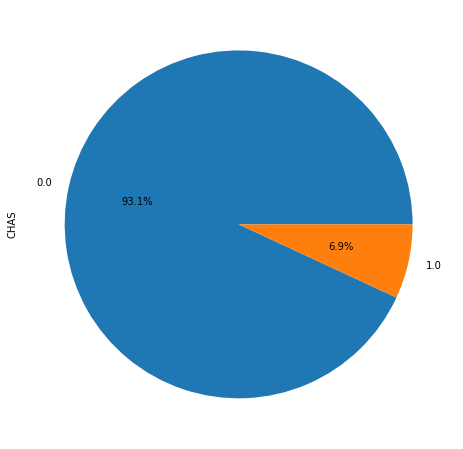

In [19]:
import matplotlib.pyplot as plt 
plt.rcParams['figure.figsize'] = [12, 8]
# Pie chart
Df['CHAS'].value_counts().plot.pie(autopct='%1.1f%%') # 바꿔야 할 부분
plt.show()

In [20]:
#문자형식으로 코딩된 질적변수를 더미변수로 코딩
Df_dummy = pd.get_dummies(Df, drop_first=True) # 기준변수를 0으로 만들어줌
Df_dummy.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.006,18.000,2.310,0.000,0.538,6.575,65.200,4.090,1.000,296.000,15.300,396.900,4.980,24.000
1,0.027,0.000,7.070,0.000,0.469,6.421,78.900,4.967,2.000,242.000,17.800,396.900,9.140,21.600
2,0.027,0.000,7.070,0.000,0.469,7.185,61.100,4.967,2.000,242.000,17.800,392.830,4.030,34.700
3,0.032,0.000,2.180,0.000,0.458,6.998,45.800,6.062,3.000,222.000,18.700,394.630,2.940,33.400
4,0.069,0.000,2.180,0.000,0.458,7.147,54.200,6.062,3.000,222.000,18.700,396.900,5.330,36.200


In [21]:
Df_dummy.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [22]:
target = Df_dummy['MEDV']

In [23]:
target

0     24.000
1     21.600
2     34.700
3     33.400
4     36.200
       ...  
501   22.400
502   20.600
503   23.900
504   22.000
505   11.900
Name: MEDV, Length: 506, dtype: float64

In [24]:
features = Df_dummy.drop(['MEDV'], axis = 1) # 여러개의 열을 삭제할 때
features

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.006,18.000,2.310,0.000,0.538,6.575,65.200,4.090,1.000,296.000,15.300,396.900,4.980
1,0.027,0.000,7.070,0.000,0.469,6.421,78.900,4.967,2.000,242.000,17.800,396.900,9.140
2,0.027,0.000,7.070,0.000,0.469,7.185,61.100,4.967,2.000,242.000,17.800,392.830,4.030
3,0.032,0.000,2.180,0.000,0.458,6.998,45.800,6.062,3.000,222.000,18.700,394.630,2.940
4,0.069,0.000,2.180,0.000,0.458,7.147,54.200,6.062,3.000,222.000,18.700,396.900,5.330
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.063,0.000,11.930,0.000,0.573,6.593,69.100,2.479,1.000,273.000,21.000,391.990,9.670
502,0.045,0.000,11.930,0.000,0.573,6.120,76.700,2.288,1.000,273.000,21.000,396.900,9.080
503,0.061,0.000,11.930,0.000,0.573,6.976,91.000,2.167,1.000,273.000,21.000,396.900,5.640
504,0.110,0.000,11.930,0.000,0.573,6.794,89.300,2.389,1.000,273.000,21.000,393.450,6.480


In [25]:
# features = Df_dummy[['Age', 'Work_Experience', 'Family_Size',
#        'Gender_Male', 'Ever_Married_Yes', 'Graduated_Yes', 'Profession_Doctor',
#        'Profession_Engineer', 'Profession_Entertainment',
#        'Profession_Executive', 'Profession_Healthcare', 'Profession_Homemaker',
#        'Profession_Lawyer', 'Profession_Marketing', 'Spending_Score_High',
#        'Spending_Score_Low']]
# 이와 같은 방식말고 불필요한것만 지정해서 뺀다고 한다면??

In [26]:
print(features)

     CRIM     ZN  INDUS  CHAS   NOX    RM    AGE   DIS   RAD     TAX  PTRATIO  \
0   0.006 18.000  2.310 0.000 0.538 6.575 65.200 4.090 1.000 296.000   15.300   
1   0.027  0.000  7.070 0.000 0.469 6.421 78.900 4.967 2.000 242.000   17.800   
2   0.027  0.000  7.070 0.000 0.469 7.185 61.100 4.967 2.000 242.000   17.800   
3   0.032  0.000  2.180 0.000 0.458 6.998 45.800 6.062 3.000 222.000   18.700   
4   0.069  0.000  2.180 0.000 0.458 7.147 54.200 6.062 3.000 222.000   18.700   
..    ...    ...    ...   ...   ...   ...    ...   ...   ...     ...      ...   
501 0.063  0.000 11.930 0.000 0.573 6.593 69.100 2.479 1.000 273.000   21.000   
502 0.045  0.000 11.930 0.000 0.573 6.120 76.700 2.288 1.000 273.000   21.000   
503 0.061  0.000 11.930 0.000 0.573 6.976 91.000 2.167 1.000 273.000   21.000   
504 0.110  0.000 11.930 0.000 0.573 6.794 89.300 2.389 1.000 273.000   21.000   
505 0.047  0.000 11.930 0.000 0.573 6.030 80.800 2.505 1.000 273.000   21.000   

          B  LSTAT  
0   39

변수들의 표준화  
참고사이트: https://jimmy-ai.tistory.com/139

In [27]:
#from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
#scaler_minmax=MinMaxScaler()
scaler_standard=StandardScaler()

In [28]:
scaler_standard.fit(features)
features_scaled=scaler_standard.transform(features)
print(features_scaled.shape)

(506, 13)


In [29]:
print(features.head())
features_scaled

   CRIM     ZN  INDUS  CHAS   NOX    RM    AGE   DIS   RAD     TAX  PTRATIO  \
0 0.006 18.000  2.310 0.000 0.538 6.575 65.200 4.090 1.000 296.000   15.300   
1 0.027  0.000  7.070 0.000 0.469 6.421 78.900 4.967 2.000 242.000   17.800   
2 0.027  0.000  7.070 0.000 0.469 7.185 61.100 4.967 2.000 242.000   17.800   
3 0.032  0.000  2.180 0.000 0.458 6.998 45.800 6.062 3.000 222.000   18.700   
4 0.069  0.000  2.180 0.000 0.458 7.147 54.200 6.062 3.000 222.000   18.700   

        B  LSTAT  
0 396.900  4.980  
1 396.900  9.140  
2 392.830  4.030  
3 394.630  2.940  
4 396.900  5.330  


array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

분석하는 feature들의 단위가 서로 다를 수 있으므로 단위를 표준화할 필요가 있는데 이를 표준화라고 함. 한편 표준화 방법에는 여러가지 있음. 여기서는 `StandardScaler : 각 특성의 평균을 0, 분산을 1로 변경하여 특성의 스케일을 맞춥니다.`를 사용함

### 회귀분석용

In [30]:
# import the train-test split
from sklearn.model_selection import train_test_split

# divide into train and test sets
features_scaled_train, features_scaled_test, target_train, target_test = train_test_split(features_scaled, target, random_state=42)#, test_size=0.2, stratify=y
# 중요한 것은 42를 사용할 때마다 처음 분할 할 때 항상 동일한 출력을 얻는다
# stratify=Y로 설정하면 나누어진 데이터셋들도 0과 1을 각각 25%, 75%로 유지한 채 분할된다
# test_size : 테스트 데이터셋의 비율(float)이나 갯수(int) (default = 0.25)
# test_size와 stratify는 필요한 옵션이지만 데이터가 적은 경우 에러가 발생될 수 있음

X_scaled과 y에 대해 train_test_split을 실행하면 총 4개의 데이터셋(X_scaled_train, X_scaled_test, y_train, y_test) 생성됨

In [31]:
print(features_scaled_train[:6])
print(target_train[:6])

[[-0.40992396 -0.48772236 -1.2660231  -0.27259857 -0.57613394  1.23997392
   0.84012202 -0.52026428 -0.75292215 -1.27835435 -0.30309415  0.41057102
  -1.09799011]
 [-0.00913688 -0.48772236  1.2319449   3.66839786  2.73234648 -0.18895873
   0.49874053 -0.97428934 -0.52300145 -0.03110494 -1.73641788 -2.94572872
   0.33178248]
 [-0.41635358  0.370669   -1.13908197 -0.27259857 -0.96572262  2.18737194
  -0.14490582  0.42766932 -0.52300145 -1.14175084 -1.64394538  0.33590374
  -1.24657432]
 [-0.37544025 -0.48772236  2.11761463 -0.27259857  0.22723076 -0.95684976
   0.96102797 -0.96872752 -0.8678825  -1.30805076  0.29797709  0.02868241
   2.04750959]
 [-0.41269248 -0.48772236 -1.15221381 -0.27259857 -0.81800718  0.06890449
  -1.82692087  0.67481374 -0.6379618   0.1292557  -0.71922039  0.203235
  -0.74475218]
 [-0.26286427 -0.48772236 -0.43725801 -0.27259857 -0.14421743 -0.30293142
   1.11749449  0.18061998 -0.6379618  -0.6012761   1.17646583  0.21990082
   0.05423839]]
182   37.900
155   15.6

In [32]:
print(features_scaled_test[:6])
print(target_test[:6])

[[-0.40983668 -0.48772236 -1.03402724 -0.27259857 -0.38609067  0.18715116
   0.55208139 -0.54607682 -0.52300145 -0.66660821 -0.85792914  0.42570183
  -0.50645674]
 [-0.41394931  1.22906036 -0.68968118  3.66839786 -0.93030547  0.67438443
  -1.26861989  0.13431903 -0.6379618  -0.91605809 -0.39556665  0.44105193
  -1.27881429]
 [-0.40821211 -0.48772236  2.42256516 -0.27259857  0.469104   -0.42972605
   1.0748218  -0.91600909 -0.6379618   1.79819419  0.76033959  0.36660394
   0.75931252]
 [-0.40985297 -0.48772236 -0.04768006 -0.27259857 -1.22400869 -0.31290404
  -2.16119024  0.70937307 -0.6379618  -0.61315466  0.34421334  0.37537543
  -0.99986846]
 [ 0.17184212 -0.48772236  1.01599907 -0.27259857  1.36749033  0.01761678
   0.8258978  -0.67827698  1.66124525  1.53092646  0.80657583  0.31156286
   0.64717349]
 [-0.40870204 -0.48772236  0.24705682 -0.27259857 -1.01668877 -0.00802708
   0.2106999   0.12224465 -0.52300145 -0.06080135  0.1130321   0.18624024
  -0.09574756]]
173   23.600
274   32

In [33]:
print(features_scaled_train.shape)
print(target_train.shape)

(379, 13)
(379,)


In [34]:
print(features_scaled_test.shape)
print(target_test.shape)

(127, 13)
(127,)


### 로지스틱 분석용

In [35]:
features_scaled_train, features_scaled_test, target_train, target_test = train_test_split(features_scaled, target, random_state=42)

In [36]:
print(features_scaled_test.shape); print(target_test.shape)
print(features_scaled_train.shape); print(target_train.shape)

(127, 13)
(127,)
(379, 13)
(379,)


### 지도학습중 수치예측

#### Linear Regression

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score # 클수록 정확도가 높다는 의미
from sklearn.metrics import mean_squared_error # 작을수록 정확도가 높다는 의미

def MAPE(y_test, y_pred):
	return np.mean(np.abs((y_test - y_pred) / y_test)) * 100 

In [38]:
LR_reg = LinearRegression() # ()안에 여러가지 옵션이 들어갈 수 있는데 기본옵션으로, n_neighbors = 3, weights = "distance"
LR_reg.fit(features_scaled_train, target_train)

LinearRegression()

In [39]:
LR_reg.pred_test = LR_reg.predict(features_scaled_test)


MAPE_LR_reg_test=MAPE(target_test, LR_reg.pred_test)
print(MAPE_LR_reg_test)

16.199174591632605


In [40]:
LR_reg.pred_train = LR_reg.predict(features_scaled_train)

MAPE_LR_reg_train=MAPE(target_train, LR_reg.pred_train)
print(MAPE_LR_reg_train)

16.70388020068276


####  K-최근접법: 예측, https://hleecaster.com/ml-knn-regression-example/

In [41]:
from sklearn.neighbors import KNeighborsRegressor

In [42]:
KN_reg = KNeighborsRegressor() # ()안에 여러가지 옵션이 들어갈 수 있는데 기본옵션으로, n_neighbors = 3, weights = "distance"

In [43]:
KN_reg.fit(features_scaled_train, target_train)
KN_reg.score(features_scaled_train, target_train) # 분류된 모델의 정확도를 측정

0.8495556978626857

In [44]:
#k최근접법으로 변수들을 통해 target의 위치 예측
KN_reg.predict([[0.7842, 0, 8.14, 0, 0.538, 5.99, 81.7, 4.2579, 4, 307, 21, 386.75, 14.67]]) # 주어진 포인트에 대한 실제 예측값 도출

array([13.7])

모델개발은 train set으로 했는데 test set에도 잘 적용되는지를 살펴보려면...

수치예측의 다양한 모델적합도 기준에서 MAPE를 권장함
https://www.researchgate.net/figure/nterpretation-of-typical-MAPE-values_tbl1_257812432

In [45]:
KN_reg.pred_test = KN_reg.predict(features_scaled_test)

In [46]:
MAPE_KN_reg_test=MAPE(target_test, KN_reg.pred_test)
print(MAPE_KN_reg_test)

12.119806744180075


In [47]:
KN_reg.pred_train = KN_reg.predict(features_scaled_train)

In [48]:
KN_reg.pred_train = KN_reg.predict(features_scaled_train)

MAPE_KN_reg_train=MAPE(target_train, KN_reg.pred_train)
print(MAPE_KN_reg_train)

10.87778697486949


#### decision tree

In [49]:
from sklearn.tree import DecisionTreeRegressor

In [50]:
DT_reg = DecisionTreeRegressor() # ()안에 여러가지 옵션이 들어갈 수 있는데 기본옵션으로, n_neighbors = 3, weights = "distance"
DT_reg.fit(features_scaled_train, target_train)

DecisionTreeRegressor()

In [51]:
DT_reg.pred_test = DT_reg.predict(features_scaled_test)
print(DT_reg.pred_test)
MAPE_DT_reg_test=MAPE(target_test, DT_reg.pred_test)
print(MAPE_DT_reg_test)

[18.5 32.  17.3 24.1 19.4 20.5 19.3 17.8 21.4 21.2 20.5 21.4  8.5 20.5
 16.2 23.9 18.8  7.2 48.3 17.8 22.5 22.5 15.6 22.  18.7 14.5 22.7 13.5
 16.7 24.5 19.5 23.1 10.4 21.9 13.3 15.6 33.  19.  22.4 24.7 19.8 32.
 48.3 19.3 22.  18.7 15.6 24.1 19.3 32.  22.9 36.1 19.4 29.9 43.1 25.
 18.1 27.9 22.  22.5 24.5 33.  29.8 18.2 28.  14.3 15.4 22.9 28.  19.
 22.6 28.7  8.4 22.9 25.   5.  20.4 42.3 10.2  8.1 22.  16.3 18.6  7.2
 20.3 28.4 14.3 23.1 22.9 18.  19.   8.5 19.2 17.5 24.3 18.4 50.  16.3
 13.5 16.3 19.  24.4 16.3 20.4 19.4 19.  19.6 23.  20.6 24.1  7.2 16.3
 23.2 29.6 29.6 14.6 50.  14.8 19.3 22.5 16.2 23.7  8.5 21.2 24.1 23.1
 25. ]
12.97278652456739


In [52]:
DT_reg.pred_train = DT_reg.predict(features_scaled_train)

MAPE_DT_reg_train=MAPE(target_train, DT_reg.pred_train)
print(MAPE_DT_reg_train)

0.0


#### Random forest

In [53]:
from sklearn.ensemble import RandomForestRegressor

In [54]:
RF_reg = RandomForestRegressor() # ()안에 여러가지 옵션이 들어갈 수 있는데 기본옵션으로, n_neighbors = 3, weights = "distance"
RF_reg.fit(features_scaled_train, target_train)

RandomForestRegressor()

In [55]:
#RF_reg.pred_test.fit(features_scaled_test.reshape(-1, 1), target_test)

In [56]:
RF_reg.pred_test = RF_reg.predict(features_scaled_test)
print(RF_reg.pred_test)

MAPE_RF_reg_test=MAPE(target_test, RF_reg.pred_test)
print(MAPE_RF_reg_test)

[22.704 30.317 17.467 23.569 16.711 21.268 19.609 15.598 21.192 20.942
 20.619 19.646  8.207 21.123 19.717 26.743 19.233  8.31  45.249 15.334
 24.304 23.982 14.318 23.381 15.06  14.94  21.679 14.066 19.63  21.167
 20.292 23.543 31.663 20.613 14.161 16.103 34.518 19.207 20.162 24.015
 18.809 29.692 44.973 19.474 22.781 13.41  15.338 24.603 18.505 27.506
 21.26  34.074 17.045 26.511 45.072 21.816 15.764 32.629 22.325 21.145
 26.021 33.525 28.496 18.29  27.343 17.226 13.939 23.358 28.596 15.926
 20.615 28.429 10.402 21.887 22.004  6.73  20.253 45.066 10.88  13.214
 21.472 11.56  20.102  9.286 20.833 26.918 15.404 23.521 24.106 17.463
 21.55   7.84  19.518 18.946 24.394 19.436 39.392 11.334 12.894 11.898
 20.519 23.822 13.435 20.115 20.324 12.225 18.958 24.997 20.131 23.304
  8.529 16.689 22.5   25.353 31.938 13.851 42.065 16.11  20.207 23.968
 19.733 24.357  7.98  20.764 24.675 21.599 24.049]
11.103269837044573


In [57]:
RF_reg.pred_train = RF_reg.predict(features_scaled_train)

MAPE_RF_reg_train=MAPE(target_train, DT_reg.pred_train)
print(MAPE_RF_reg_train)

0.0


In [58]:
MAPE_DT_reg_test=MAPE(target_test, RF_reg.pred_test)
print(MAPE_RF_reg_test)

11.103269837044573


#### 정확도 분석결과 summary

In [59]:
reg_models_train = [('Linear regression', MAPE_LR_reg_train),
                    ('KNeighbors', MAPE_KN_reg_train),
                    ('Decision tree', MAPE_DT_reg_train),
                    ('Random Forest', MAPE_RF_reg_train)]
reg_models_test = [('Linear regression', MAPE_LR_reg_test),
                   ('KNeighbors', MAPE_KN_reg_test),
                   ('Decision tree', MAPE_DT_reg_test),
                   ('Random Forest', MAPE_RF_reg_test)]

In [60]:
reg_train_summary = pd.DataFrame(data = reg_models_train, columns=['Model', 'MAPE'])
reg_train_summary.sort_values(by=['MAPE'], axis=0, ascending=False)

,Model,MAPE
0,Linear regression,16.704
1,KNeighbors,10.878
2,Decision tree,0.000
3,Random Forest,0.000


In [61]:
reg_test_summary = pd.DataFrame(data = reg_models_test, columns=['Model', 'MAPE'])
reg_test_summary.sort_values(by=['MAPE'], axis=0, ascending=False)

,Model,MAPE
0,Linear regression,16.199
1,KNeighbors,12.120
2,Decision tree,11.103
3,Random Forest,11.103


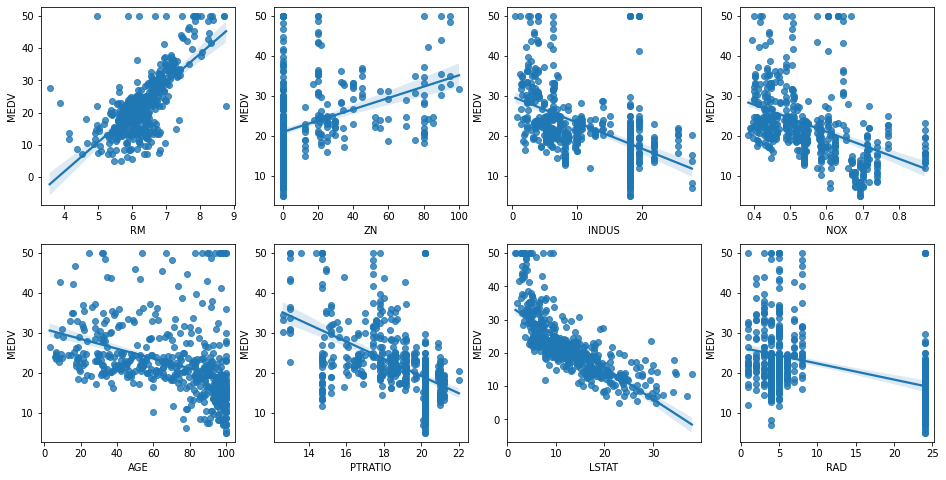

In [62]:
# 2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4x2개의 ax를 가짐.
fig, axs = plt.subplots(figsize=(16,8) , ncols=4 , nrows=2)
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i , feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature , y=target, data=Df , ax=axs[row][col])

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

y_target = Df[['MEDV']]
X_data = Df.drop(['MEDV'], axis=1,inplace=False)

X_train , X_test , y_train , y_test = train_test_split(X_data , y_target ,test_size=0.3, random_state=156)

# Linear Regression OLS로 학습/예측/평가 수행. 
lr = LinearRegression()
lr.fit(X_train ,y_train )
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 17.297 , RMSE : 4.159
Variance score : 0.757


In [64]:
print('절편 값:',lr.intercept_)
print('회귀 계수값:', np.round(lr.coef_, 1))

절편 값: [40.99559517]
회귀 계수값: [[ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
   -0.6]]


In [65]:
# # 회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성. index가 컬럼명에 유의
# coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns)
# coeff.sort_values(ascending=False)

In [66]:
from sklearn.model_selection import cross_val_score

y_target = Df[['MEDV']]
X_data = Df.drop(['MEDV'], axis=1,inplace=False)
lr = LinearRegression()

# cross_val_score( )로 5 Fold 셋으로 MSE 를 구한 뒤 이를 기반으로 다시  RMSE 구함. 
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring="neg_mean_squared_error")로 반환된 값은 모두 음수 
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores:  [-12.46 -26.05 -33.07 -80.76 -33.31]
 5 folds 의 개별 RMSE scores :  [3.53 5.1  5.75 8.99 5.77]
 5 folds 의 평균 RMSE : 5.829 
